In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/Iris (1).csv


In [2]:
import pandas as pd
# Load the dataset (adjust the file path if needed)
df = pd.read_csv('/kaggle/input/iris-dataset/Iris (1).csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# drop Id column
df = df.drop(columns=['Id'], errors='ignore')

# if Species has text names like "Iris-setosa", standardize (optional)
df['Species'] = df['Species'].str.replace('Iris-', '', regex=False)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No null , all good


In [7]:
#1. Chwck the data is imbalance?

# Check the distribution of 'Species' numerically
display(df['Species'].value_counts())

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

target is balanced.

In [8]:
categorical_columns = []
for col in df.columns:
    if df[col].dtype == 'object' or isinstance(df[col].dtype, pd.CategoricalDtype):
        categorical_columns.append(col)

print("Categorical Columns:")
if categorical_columns:
    for col in categorical_columns:
        print(col)
else:
    print("No categorical columns found.")

Categorical Columns:
Species


In [9]:
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

if duplicate_rows.shape[0] > 0:
    print("Duplicate rows:")
    display(duplicate_rows)

Number of duplicate rows: 3
Duplicate rows:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [10]:
df = df.drop_duplicates()


In [11]:
df.shape

(147, 5)

In [12]:
import pandas as pd

numeric_cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

outliers = pd.DataFrame()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers[col] = (df[col] < lower) | (df[col] > upper)

outliers.sum()


SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [13]:
Q1 = df["SepalWidthCm"].quantile(0.25)
Q3 = df["SepalWidthCm"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_out = df[(df["SepalWidthCm"] < lower) | (df["SepalWidthCm"] > upper)]
df_out


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [14]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['Species'])
y = df['Species']

le = LabelEncoder()
y_encoded = le.fit_transform(y)   # 0,1,2 corresponding to species

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded
)

In [16]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


no need to scale

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

Logistic Regression accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Random Forest accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(rf, X, y_encoded, cv=5, scoring='accuracy')
print("5-fold CV accuracy: mean = {:.3f}, std = {:.3f}".format(scores.mean(), scores.std()))

5-fold CV accuracy: mean = 0.959, std = 0.026


In [20]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(lr, X, y_encoded, cv=5, scoring='accuracy')
print("Logistic CV: mean = {:.3f}, std = {:.3f}".format(scores_lr.mean(), scores_lr.std()))


Logistic CV: mean = 0.959, std = 0.026


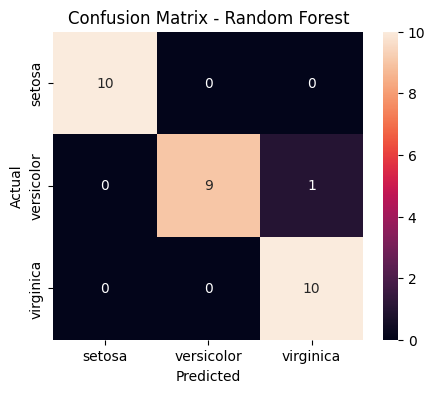

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [22]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp

PetalLengthCm    0.443075
PetalWidthCm     0.414662
SepalLengthCm    0.121489
SepalWidthCm     0.020774
dtype: float64

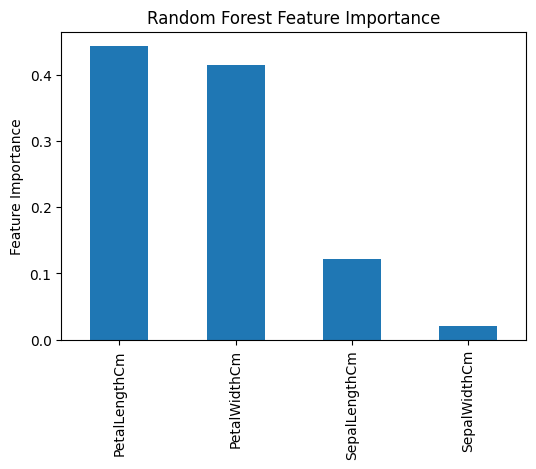

In [23]:
import matplotlib.pyplot as plt

feat_imp.plot(kind='bar', figsize=(6,4))
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [25]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 3, 5, 8],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}


In [26]:
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X, y_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [27]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.9590804597701149


In [28]:
best_rf = grid.best_estimator_

best_rf.fit(X_train, y_train)

y_pred_best = best_rf.predict(X_test)

print("Tuned RF accuracy:", accuracy_score(y_test, y_pred_best))


Tuned RF accuracy: 0.9666666666666667


After tuning Random Forest using GridSearchCV, the accuracy remained at 96.66%. This suggests that the default Random Forest configuration already performs close to optimal on the Iris dataset, and additional tuning provided only marginal benefit.